In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results.1d/mergegram_1_1_N=100.csv')
#df = pd.read_csv('results.1d/persistence_1_1_N=100.csv')

true_distrib = df.true_distrib.unique()
alter_distrib = df.alter_distrib.unique()
values = np.zeros((len(alter_distrib), len(true_distrib)))

In [3]:
def plot_power_matrix(test_label='ks', exclude=[]):

    for id_td, td in enumerate(true_distrib):
        for id_ad, ad in enumerate(alter_distrib):
            idx = (df.true_distrib == td) & (df.alter_distrib == ad)
            if np.sum(idx) > 1:
                raise ValueError('Labels are not unique')
            if np.sum(idx) == 1: 
                values[id_ad, id_td] = 1-df.loc[idx][test_label]
                
    plt.rcParams['figure.figsize'] = [12, 12]
    fig, ax = plt.subplots(1,1)
    
    # compute average-power
    # exclude diagonal
    for id_td, _ in enumerate(true_distrib):
        values[id_td, id_td] = None
    for id_td, td in enumerate(true_distrib):
        for id_ad, ad in enumerate(alter_distrib):
            if (ad in exclude) or (td in exclude):
                values[id_ad, id_td ] = None
    
    avg_power = np.nanmean(values)
    print(avg_power)
    
    im = ax.imshow(values)
    
    ax.set_xticks(range(len(true_distrib)))
    ax.set_xticklabels(true_distrib, rotation = 90)
    ax.set_yticks(range(len(alter_distrib)))
    ax.set_yticklabels(alter_distrib)
    ax.set_xlabel('TRUE Distribution')
    ax.set_ylabel('ALTER Distribution')

    
    ax.set_title(f'POWER of {test_label}-test = {avg_power}')
    fig.colorbar(im)

0.7128095238095238


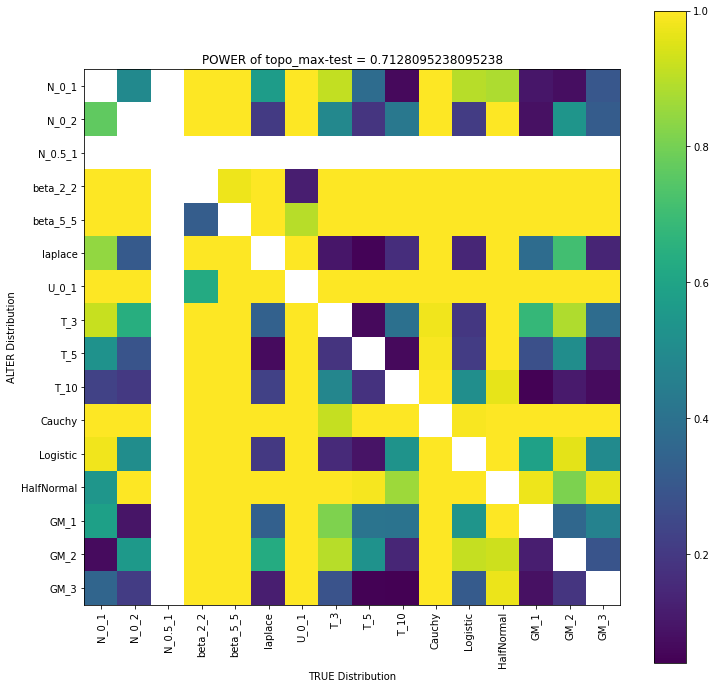

In [4]:
plot_power_matrix('topo_max', exclude=['N_0.5_1'])

0.7069047619047618


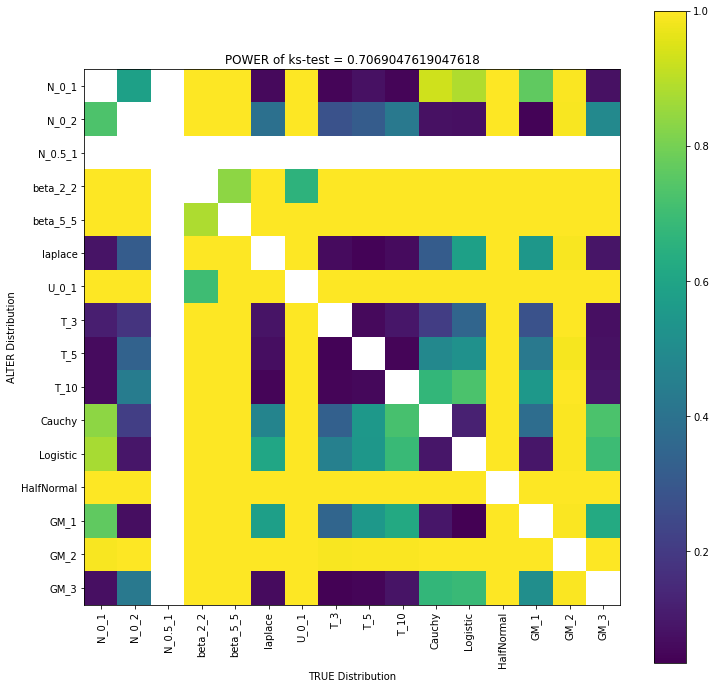

In [5]:
plot_power_matrix('ks', exclude=['N_0.5_1'])

0.7147380952380954


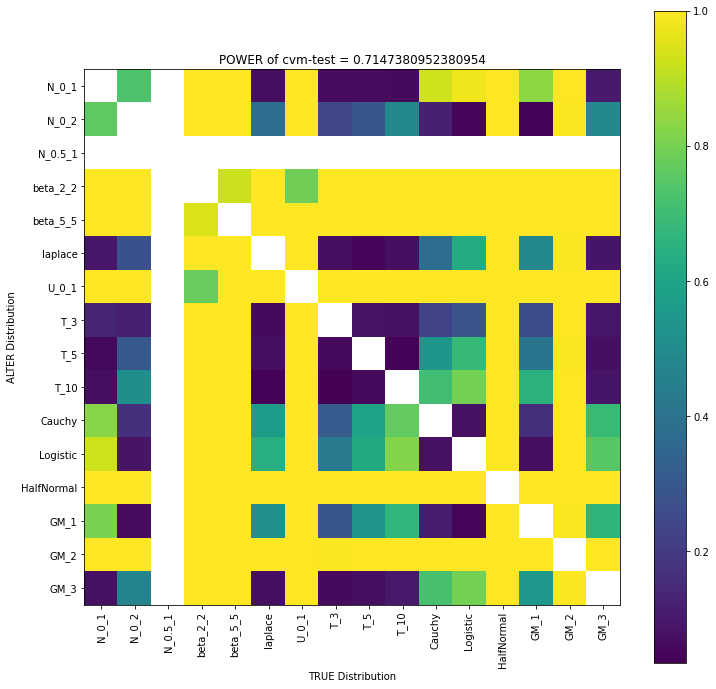

In [6]:
plot_power_matrix('cvm', exclude=['N_0.5_1'])